<a href="https://colab.research.google.com/github/kabeerbora/ECON5625/blob/main/RDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

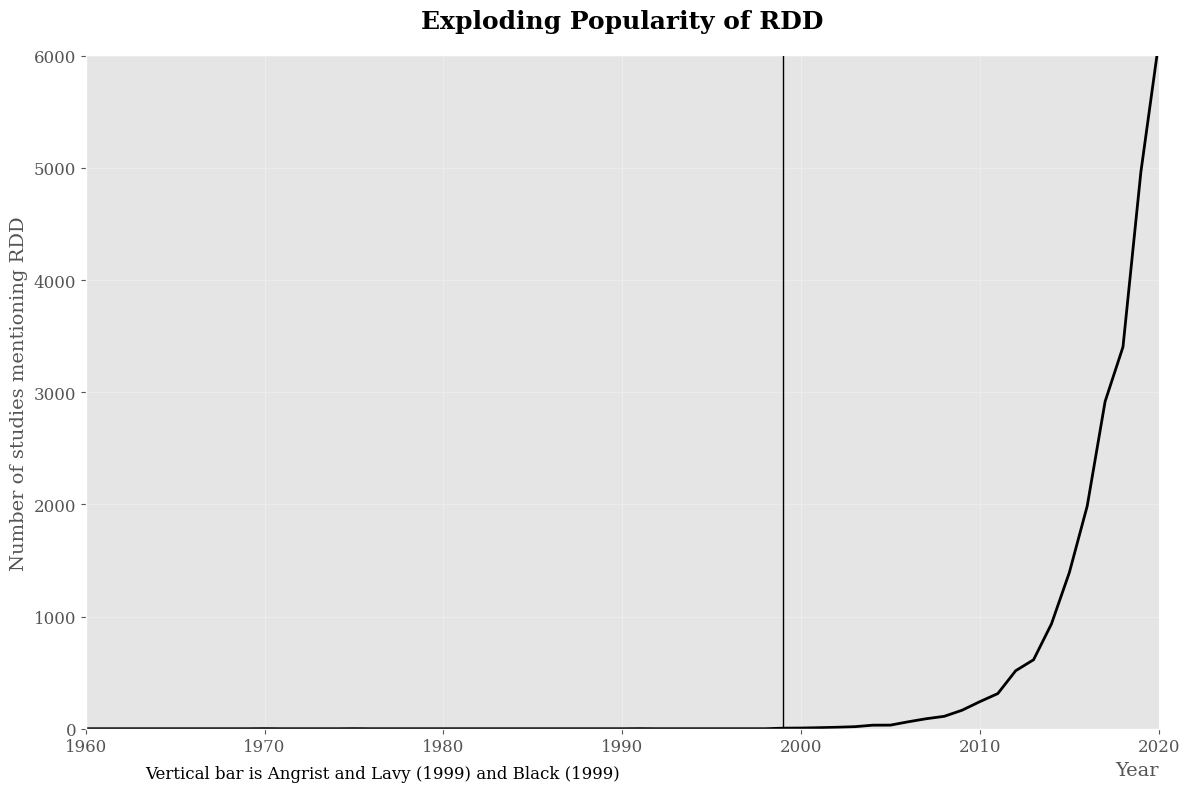

Total studies by 2020: 6118
Studies before 1999: 3
Studies after 1999: 23944


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

years = np.arange(1960, 2021)
rdd_mentions = np.zeros(len(years))

for i, year in enumerate(years):
    if year < 1999:
        rdd_mentions[i] = np.random.poisson(0.1)
    elif year == 1999:
        rdd_mentions[i] = 5
    else:
        years_since_1999 = year - 1999
        base_growth = 5 * np.exp(0.35 * years_since_1999)
        rdd_mentions[i] = base_growth + np.random.normal(0, base_growth * 0.1)

rdd_mentions = np.maximum(rdd_mentions, 0)

plt.figure(figsize=(12, 8))
plt.plot(years, rdd_mentions, 'k-', linewidth=2)
plt.axvline(x=1999, color='black', linestyle='-', linewidth=1)
plt.xlim(1960, 2020)
plt.ylim(0, 6000)

plt.xlabel('Year', fontsize=14, loc='right')

plt.ylabel('Number of studies mentioning RDD', fontsize=14)
plt.title('Exploding Popularity of RDD', fontsize=18, fontweight='bold', pad=20)

plt.figtext(0.125, 0.02, 'Vertical bar is Angrist and Lavy (1999) and Black (1999)',
           fontsize=12, ha='left')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

print(f"Total studies by 2020: {int(rdd_mentions[-1])}")
print(f"Studies before 1999: {int(np.sum(rdd_mentions[years < 1999]))}")
print(f"Studies after 1999: {int(np.sum(rdd_mentions[years >= 1999]))}")

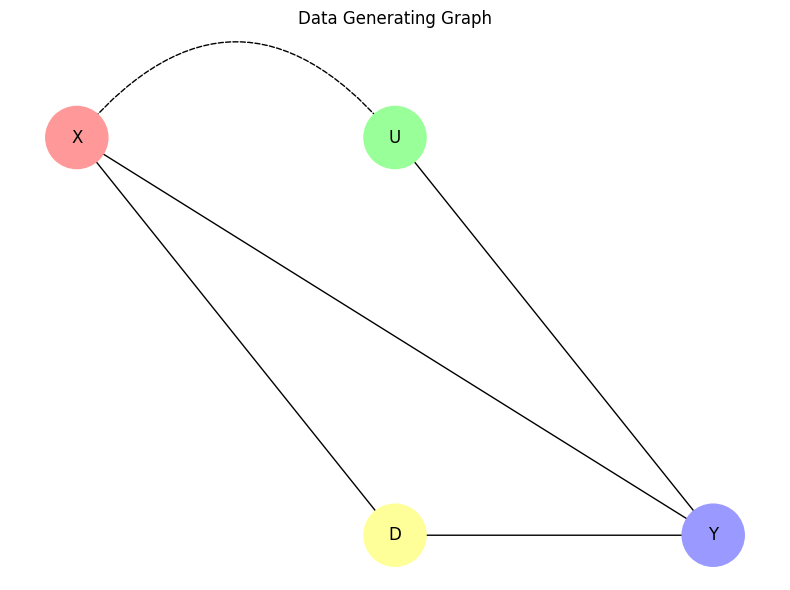

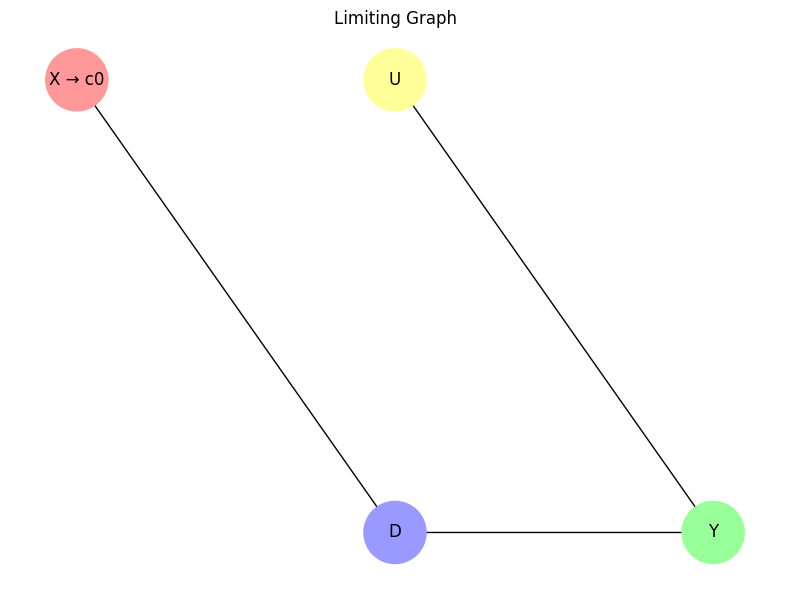

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create DAG A (Data generating graph)
G1 = nx.DiGraph()
G1.add_edges_from([('X', 'U'), ('U', 'Y'), ('X', 'D'), ('X', 'Y'), ('D', 'Y')])
pos1 = {'X': (0, 1), 'U': (1, 1), 'D': (1, 0), 'Y': (2, 0)}
colors1 = ['#FF9999', '#99FF99', '#9999FF', '#FFFF99']  # Red, Green, Blue, Yellow

plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G1, pos1, node_color=colors1, node_size=2000)

# Create custom labels with X → c0
labels1 = {'X': 'X', 'U': 'U', 'D': 'D', 'Y': 'Y'}
nx.draw_networkx_labels(G1, pos1, labels=labels1, font_size=12)

# Draw edges with arrowheads
nx.draw_networkx_edges(G1, pos1, edgelist=[('U', 'Y'), ('X', 'D'), ('X', 'Y'), ('D', 'Y')],
                       arrows=True, arrowstyle='-|>', arrowsize=20)
nx.draw_networkx_edges(G1, pos1, edgelist=[('X', 'U')], connectionstyle='arc3,rad=-0.6',
                       style='dashed', arrows=True, arrowstyle='-|>', arrowsize=20)

plt.title('Data Generating Graph')
plt.axis('off')
plt.tight_layout()
plt.show()

# Create DAG B (Limiting graph)
G2 = nx.DiGraph()
G2.add_edges_from([('X', 'D'), ('D', 'Y'), ('U', 'Y')])
pos2 = {'X': (0, 1), 'D': (1, 0), 'U': (1, 1), 'Y': (2, 0)}
colors2 = ['#FF9999', '#9999FF', '#99FF99', '#FFFF99']  # Red, Blue, Green, Yellow

plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G2, pos2, node_color=colors2, node_size=2000)

# Create custom labels with X → c0
labels2 = {'X': 'X → c0', 'U': 'U', 'D': 'D', 'Y': 'Y'}
nx.draw_networkx_labels(G2, pos2, labels=labels2, font_size=12)

# Draw edges with arrowheads
nx.draw_networkx_edges(G2, pos2, edgelist=[('X', 'D'), ('D', 'Y'), ('U', 'Y')],
                       arrows=True, arrowstyle='-|>', arrowsize=20)

plt.title('Limiting Graph')
plt.axis('off')
plt.tight_layout()
plt.show()

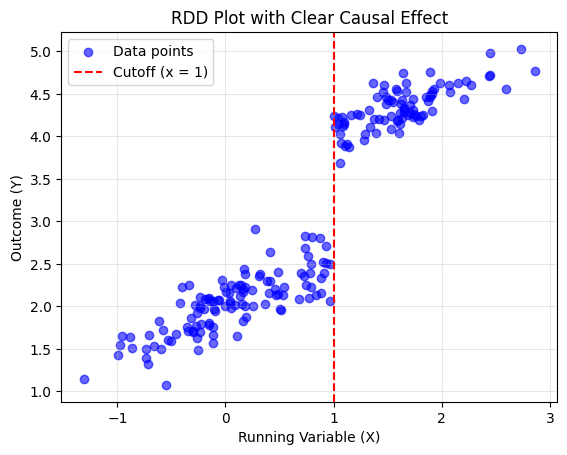

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
np.random.seed(42)
n_points = 200
x = np.concatenate([np.random.normal(0, 0.5, n_points//2), np.random.normal(1.5, 0.5, n_points//2)])
y = 2 + 0.5 * x + np.random.normal(0, 0.2, n_points)
y[x >= 1] += 1.5  # Clear causal jump at cutoff = 1
cutoff = 1

# Create plot
plt.scatter(x, y, alpha=0.6, color='blue', label='Data points')
plt.axvline(x=cutoff, color='red', linestyle='--', label=f'Cutoff (x = {cutoff})')
plt.xlabel('Running Variable (X)')
plt.ylabel('Outcome (Y)')
plt.title('RDD Plot')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

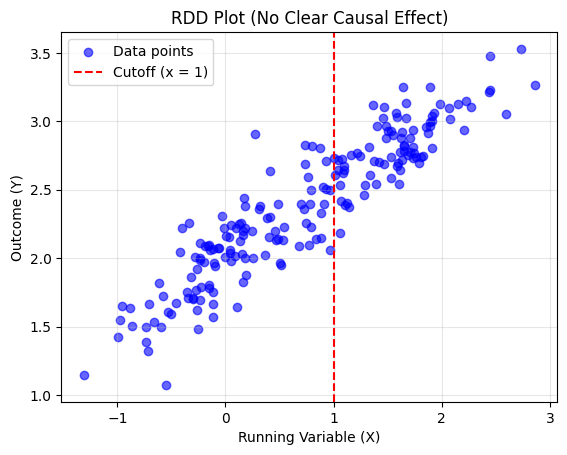

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate data
n_points = 200
x = np.concatenate([np.random.normal(0, 0.5, n_points//2), np.random.normal(1.5, 0.5, n_points//2)])
y = 2 + 0.5 * x + np.random.normal(0, 0.2, n_points)  # No jump at cutoff
cutoff = 1

# Create scatter plot
plt.scatter(x, y, alpha=0.6, color='blue', label='Data points')
plt.axvline(x=cutoff, color='red', linestyle='--', label=f'Cutoff (x = {cutoff})')
plt.xlabel('Running Variable (X)')
plt.ylabel('Outcome (Y)')
plt.title('RDD Plot (No Clear Causal Effect)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

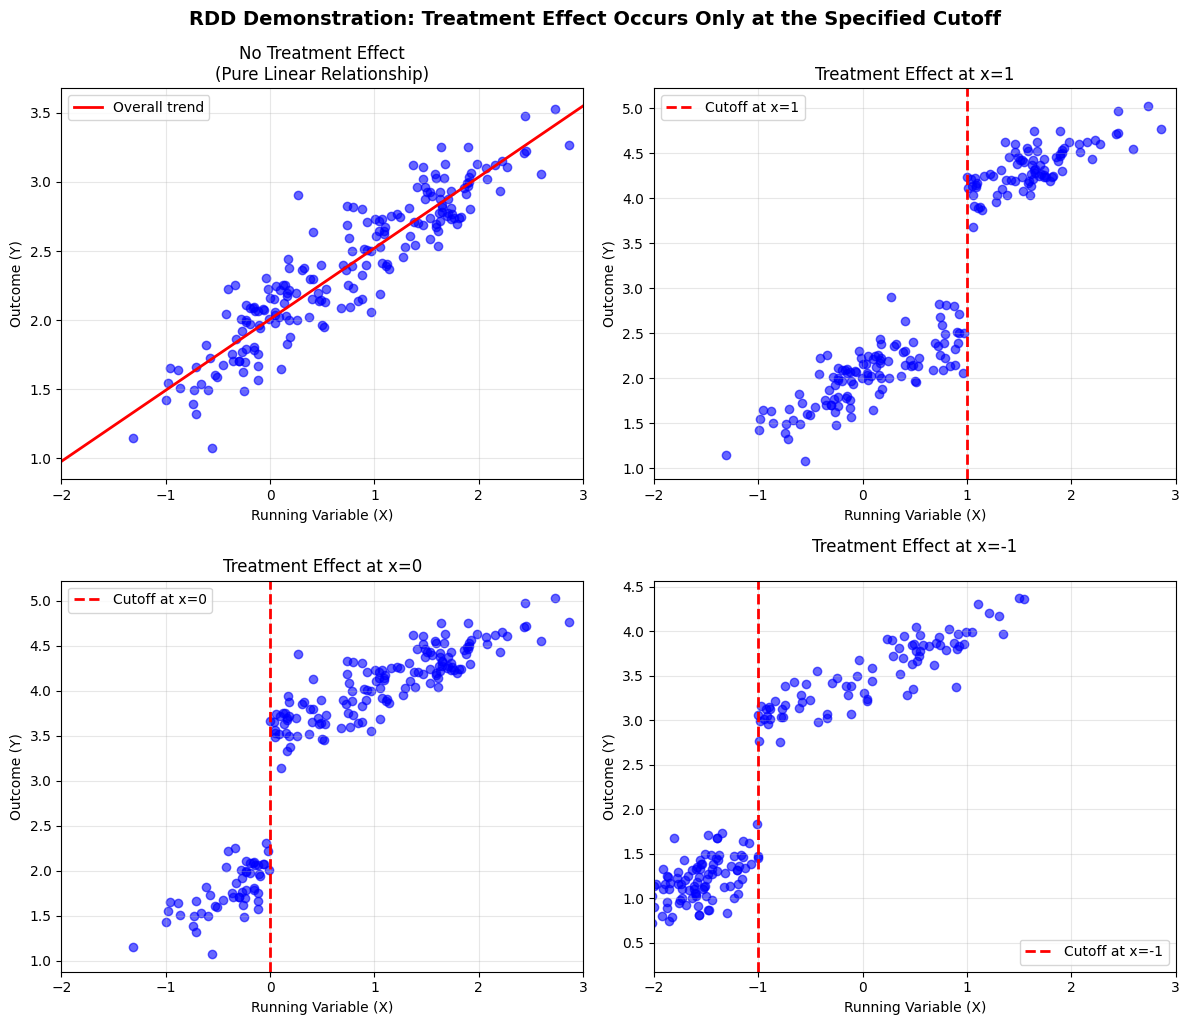

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate base data without treatment effect
np.random.seed(42)
n_points = 200
x = np.concatenate([np.random.normal(0, 0.5, n_points//2), np.random.normal(1.5, 0.5, n_points//2)])
base_y = 2 + 0.5 * x + np.random.normal(0, 0.2, n_points)

# For cutoff at -1, generate more control data points
np.random.seed(43)  # Different seed for varied data
x_more_control = np.concatenate([
    np.random.normal(-1.5, 0.6, n_points//2 + 50),  # More control points
    np.random.normal(0.5, 0.4, n_points//2 - 50)    # Fewer treatment points
])
base_y_more_control = 2 + 0.5 * x_more_control + np.random.normal(0, 0.2, n_points)

# Create different treatment scenarios
y_treatment_at_1 = base_y.copy()
y_treatment_at_1[x >= 1] += 1.5  # Treatment effect at cutoff = 1

y_treatment_at_0 = base_y.copy()
y_treatment_at_0[x >= 0] += 1.5  # Treatment effect at cutoff = 0

y_treatment_at_minus1 = base_y_more_control.copy()
y_treatment_at_minus1[x_more_control >= -1] += 1.5  # Treatment effect at cutoff = -1

# Create the 2x2 panel
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Set common x-axis limits for all plots
x_min, x_max = -2, 3

# Plot 1: No treatment (linear upward trend)
axes[0].scatter(x, base_y, alpha=0.6, color='blue')
axes[0].set_xlim(x_min, x_max)
axes[0].set_xlabel('Running Variable (X)')
axes[0].set_ylabel('Outcome (Y)')
axes[0].set_title('No Treatment Effect\n(Pure Linear Relationship)')
axes[0].grid(True, alpha=0.3)

# Add trend line for no treatment
z = np.polyfit(x, base_y, 1)
p = np.poly1d(z)
x_trend = np.linspace(x_min, x_max, 100)
axes[0].plot(x_trend, p(x_trend), 'red', linewidth=2, label='Overall trend')
axes[0].legend()

# Plot 2: Treatment at cutoff = 1
axes[1].scatter(x, y_treatment_at_1, alpha=0.6, color='blue')
axes[1].axvline(x=1, color='red', linestyle='--', linewidth=2, label='Cutoff at x=1')
axes[1].set_xlim(x_min, x_max)
axes[1].set_xlabel('Running Variable (X)')
axes[1].set_ylabel('Outcome (Y)')
axes[1].set_title('Treatment Effect at x=1')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

# Plot 3: Treatment at cutoff = 0
axes[2].scatter(x, y_treatment_at_0, alpha=0.6, color='blue')
axes[2].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Cutoff at x=0')
axes[2].set_xlim(x_min, x_max)
axes[2].set_xlabel('Running Variable (X)')
axes[2].set_ylabel('Outcome (Y)')
axes[2].set_title('Treatment Effect at x=0')
axes[2].grid(True, alpha=0.3)
axes[2].legend()

# Plot 4: Treatment at cutoff = -1 (with more control data points)
axes[3].scatter(x_more_control, y_treatment_at_minus1, alpha=0.6, color='blue')
axes[3].axvline(x=-1, color='red', linestyle='--', linewidth=2, label='Cutoff at x=-1')
axes[3].set_xlim(x_min, x_max)
axes[3].set_xlabel('Running Variable (X)')
axes[3].set_ylabel('Outcome (Y)')
axes[3].set_title('Treatment Effect at x=-1\n')
axes[3].grid(True, alpha=0.3)
axes[3].legend()

# Add annotation to show we have more control units
control_count = np.sum(x_more_control < -1)
treatment_count = np.sum(x_more_control >= -1)


plt.tight_layout()
plt.suptitle('RDD Demonstration: Treatment Effect Occurs Only at the Specified Cutoff',
             y=1.02, fontsize=14, fontweight='bold')
plt.show()

/usr/local/lib/python3.12/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.12/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


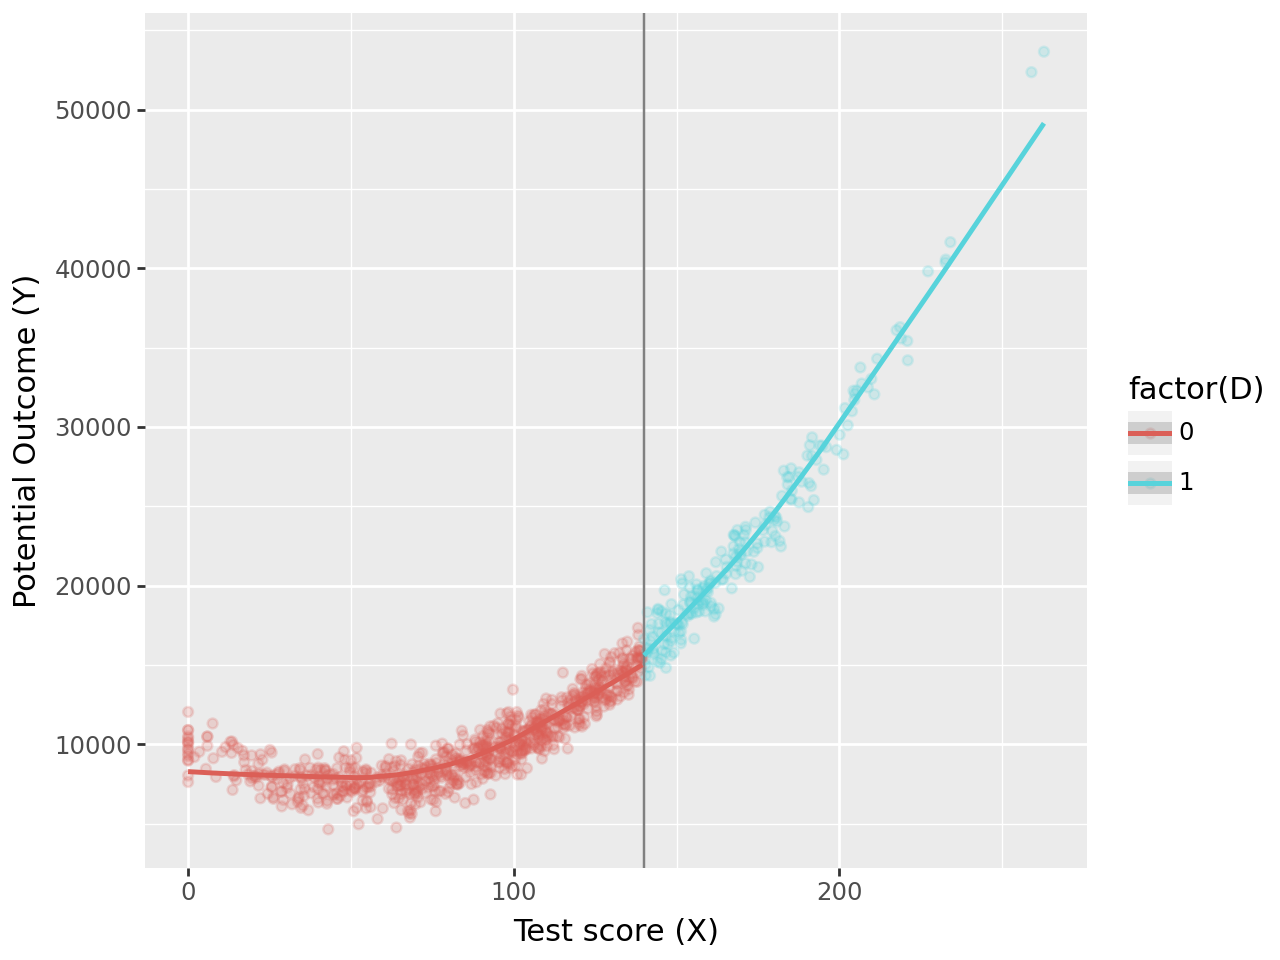

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from itertools import combinations
import plotnine as p

# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file):
    return pd.read_stata("https://github.com/scunning1975/mixtape/raw/master/" + file)

np.random.seed(12282020)

dat = pd.DataFrame({'x': np.random.normal(100, 50, 1000)})
dat.loc[dat.x<0, 'x'] = 0
dat['x2'] = dat['x']**2
dat['x3'] = dat['x']**3
dat['D'] = 0
dat.loc[dat.x>140, 'D'] = 1

dat['y3'] = 10000 + 0*dat.D - 100 * dat.x + dat.x2 + np.random.normal(0, 1000, 1000)
dat = dat[dat.x < 280]

# Linear Model for conditional expectation
p.ggplot(dat, p.aes(x='x', y='y3', color = 'factor(D)')) +    p.geom_point(alpha = 0.2) +    p.geom_vline(xintercept = 140, colour = "grey") +    p.stat_smooth(method = "lm", se = 'F') +    p.labs(x = "Test score (X)", y = "Potential Outcome (Y)")


# Linear Model for conditional expectation
p.ggplot(dat, p.aes(x='x', y='y3', color = 'factor(D)')) +    p.geom_point(alpha = 0.2) +    p.geom_vline(xintercept = 140, colour = "grey") +    p.stat_smooth(method = "lowess", se = 'F') +    p.labs(x = "Test score (X)", y = "Potential Outcome (Y)")

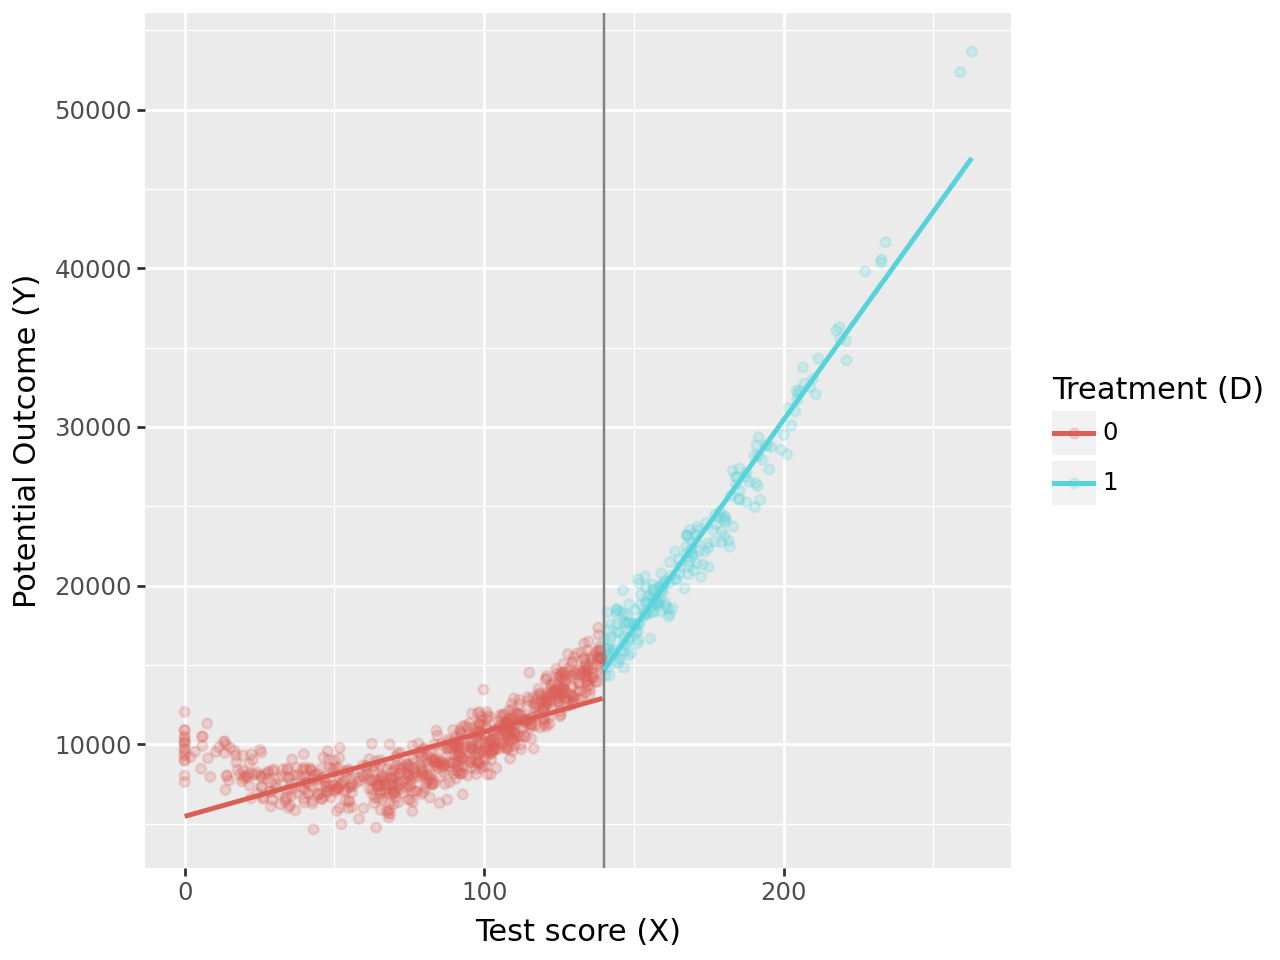

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from itertools import combinations
import plotnine as p

# Data generation
np.random.seed(12282020)

dat = pd.DataFrame({'x': np.random.normal(100, 50, 1000)})
dat.loc[dat.x < 0, 'x'] = 0
dat['x2'] = dat['x'] ** 2
dat['x3'] = dat['x'] ** 3
dat['D'] = 0
dat.loc[dat.x > 140, 'D'] = 1

dat['y3'] = 10000 + 0 * dat.D - 100 * dat.x + dat['x2'] + np.random.normal(0, 1000, 1000)
dat = dat[dat.x < 280]

# Plot: fit straight lines for each group
p.ggplot(dat, p.aes(x='x', y='y3', color='factor(D)')) + \
    p.geom_point(alpha=0.2) + \
    p.geom_vline(xintercept=140, colour="grey") + \
    p.stat_smooth(method="lm", formula='y ~ x', se=False) + \
    p.labs(x="Test score (X)", y="Potential Outcome (Y)", color="Treatment (D)")
